In [3]:
import pandas as pd, nltk, numpy as np, networkx as nx
from scipy.spatial.distance import cosine

In [4]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')


def sents2vec(sents):
    return model.encode(sents)

In [24]:
sent = ['present invention relate integrate circuit IC design', 'circuit generate pulse signal response input clock signal', 'conventional pulse generator design generate pulse signal response input clock signal', 'output NAND gate device invert generate pulse signal', 'desirable design new pulse generator generate pulse signal cut short insufficient clock width', 'present invention disclose generate pulse signal response clock signal', 'construction operation invention additional objective understand follow description specific embodiment', 'read connection accompany draw', 'signal θ combine NAND gate device', 'provide output invert inverter', 'This turn cause pulse generator fail', 'pulse generator able generate pulse signal cut short insufficient clock width', 'suffer signal fight issue', 'input terminal latch module couple output inverter', 'second input terminal tie output node pulse generator', 'signal combine NAND gate', 'generate output invert inverter', 'At time t lead edge signal C trigger latch module store cause signal B', 'output NAND gate device', 'illustration provide different embodiment', 'embodiment implement different feature invention', 'Specific embodiment component describe help clarify invention', 'intend limit invention describe claim', 'invention illustrate', 'intend limit detail show', 'modification depart spirit invention', 'appropriate append claim construe']

In [25]:
sentence_vecs = sents2vec(sent)

In [26]:
size = len(sentence_vecs)
dist_mtr = np.zeros((size, size))
dists = []
for row in range(size):
    for col in range(size):
        if col > row:
            dist_mtr[row, col] = dist_mtr[col, row] = cosine(sentence_vecs[row], sentence_vecs[col])
            dists.append(dist_mtr[row, col])

<AxesSubplot:ylabel='Density'>

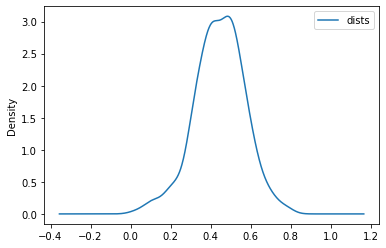

In [27]:
dists = sorted(dists)
df = pd.DataFrame(data={'dists': dists})
df.plot.kde(bw_method=0.3)

In [28]:
dists[0:10]

[0.024804353713989258,
 0.06301683187484741,
 0.09395140409469604,
 0.09921455383300781,
 0.11079341173171997,
 0.11673444509506226,
 0.12583917379379272,
 0.13005495071411133,
 0.1731572151184082,
 0.1746840476989746]

In [29]:
graph = nx.Graph()
graph.add_nodes_from(list(range(size)))
node_labels = {}
for i in range(size):
    node_labels[i] = sent[i]

In [42]:
med = np.median(dists)
threshold = (med+dists[0]) / 5
for row in range(size):
    for col in range(size):
        if col > row:
            if dist_mtr[row, col] < threshold:
                graph.add_edge(row, col)

In [43]:
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

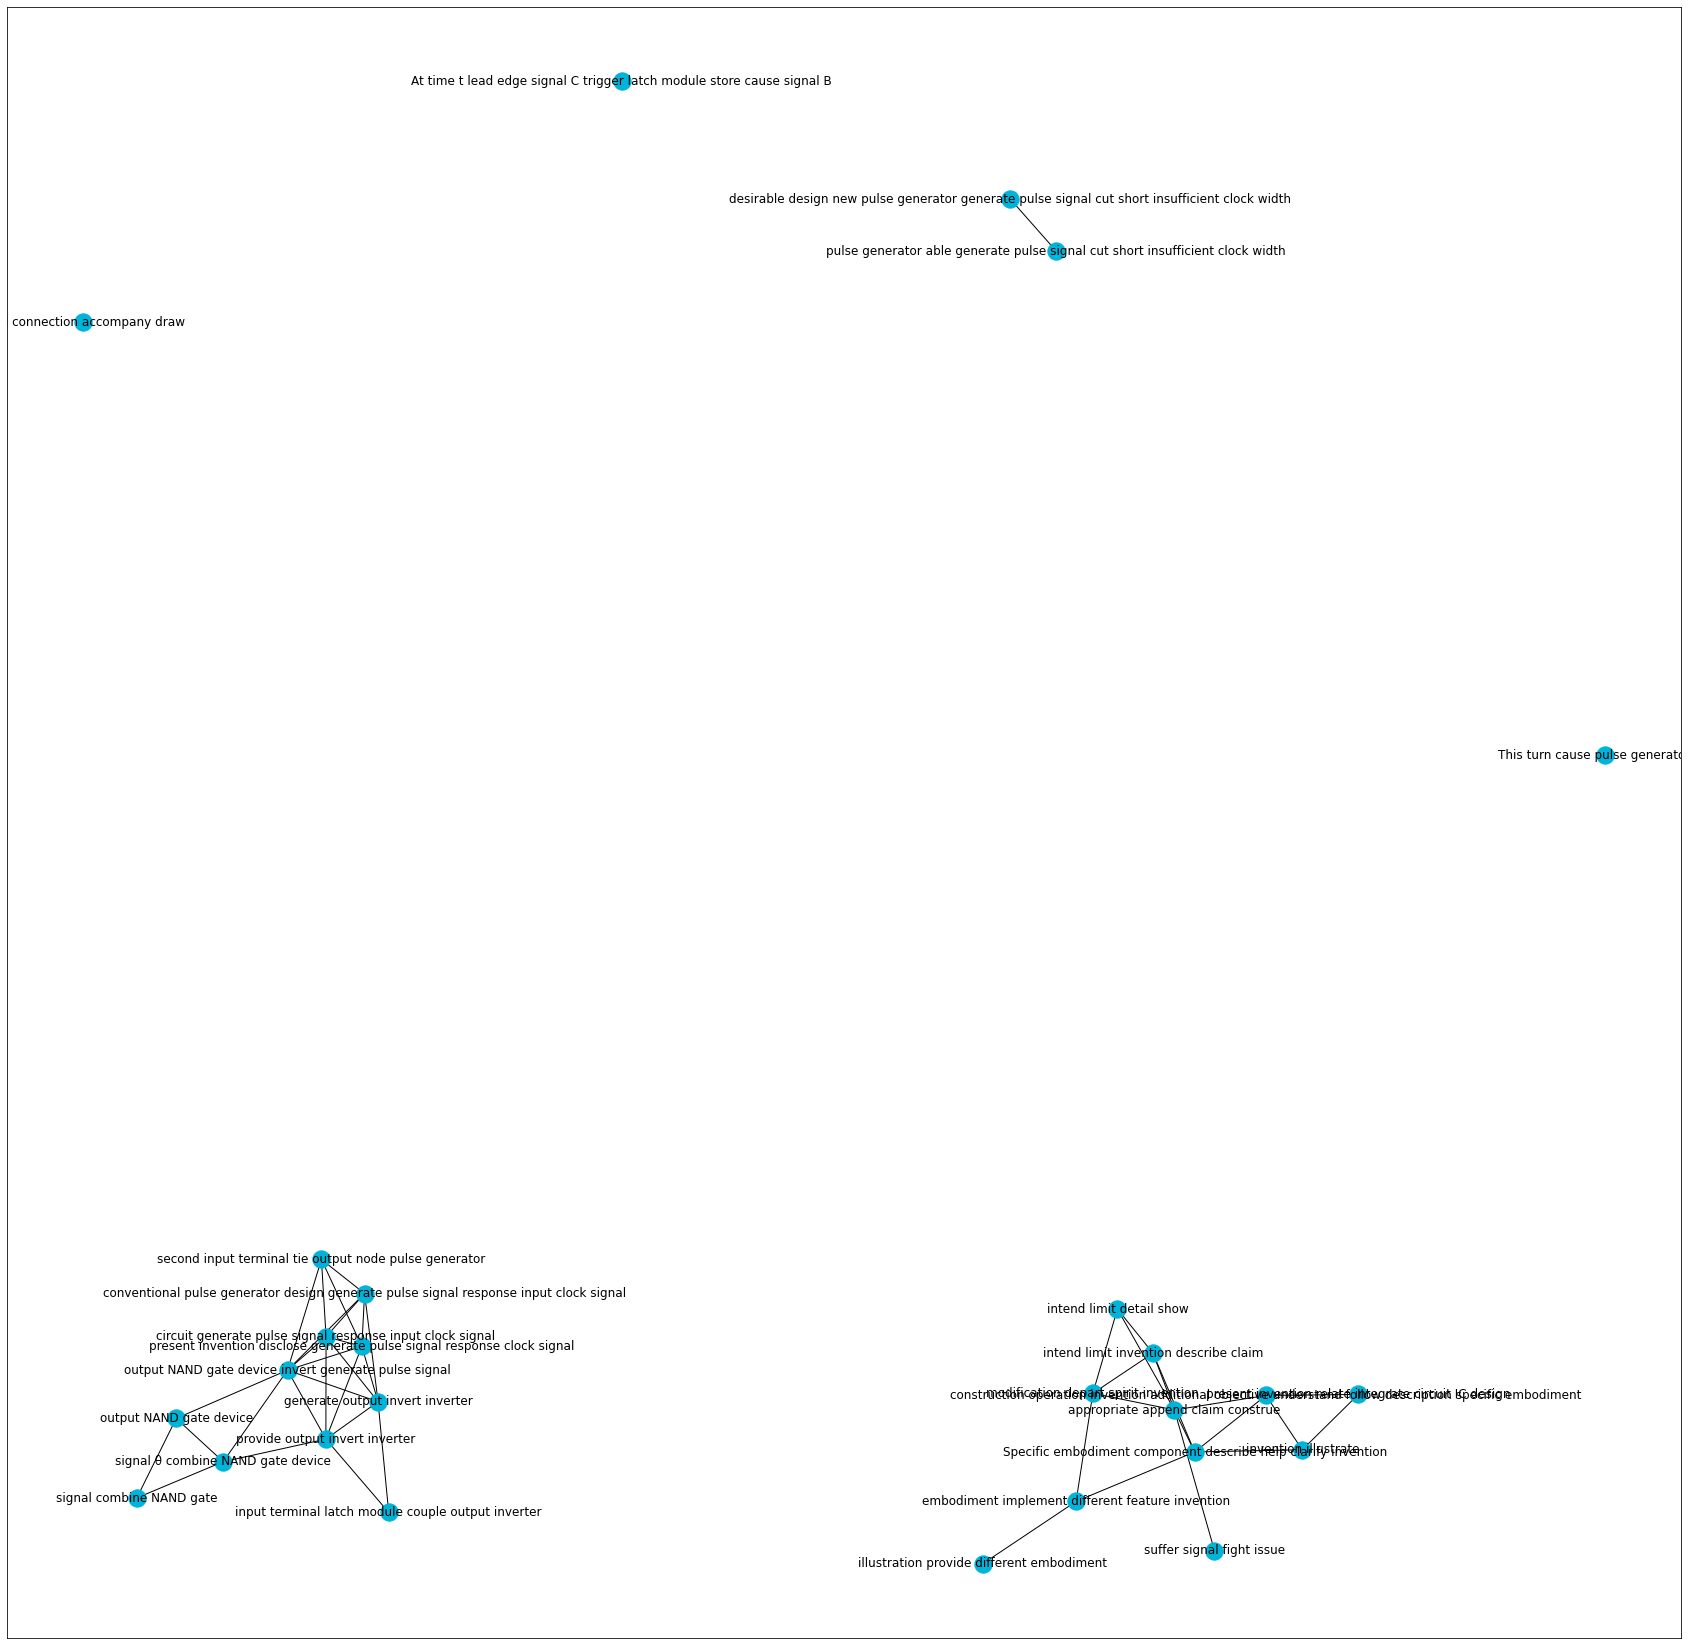

In [44]:
G = graph
plt.figure(1, figsize=(30, 30)) 
pos = graphviz_layout(G, prog='dot')
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, labels=node_labels, node_color='#00b4d9')
# plt.text(-2, -0.5, str(query), ha='center', va='baseline', size=20, wrap=True)
plt.savefig('sent_g.png')
plt.show()

In [16]:
H = []
for connected_compoent in nx.connected_components(graph):
    H.append(G.subgraph(connected_compoent))


In [23]:
sent[nx.center(H[1])[0]]

'characterize comprise weight follow functional agent'

KeyError: 0

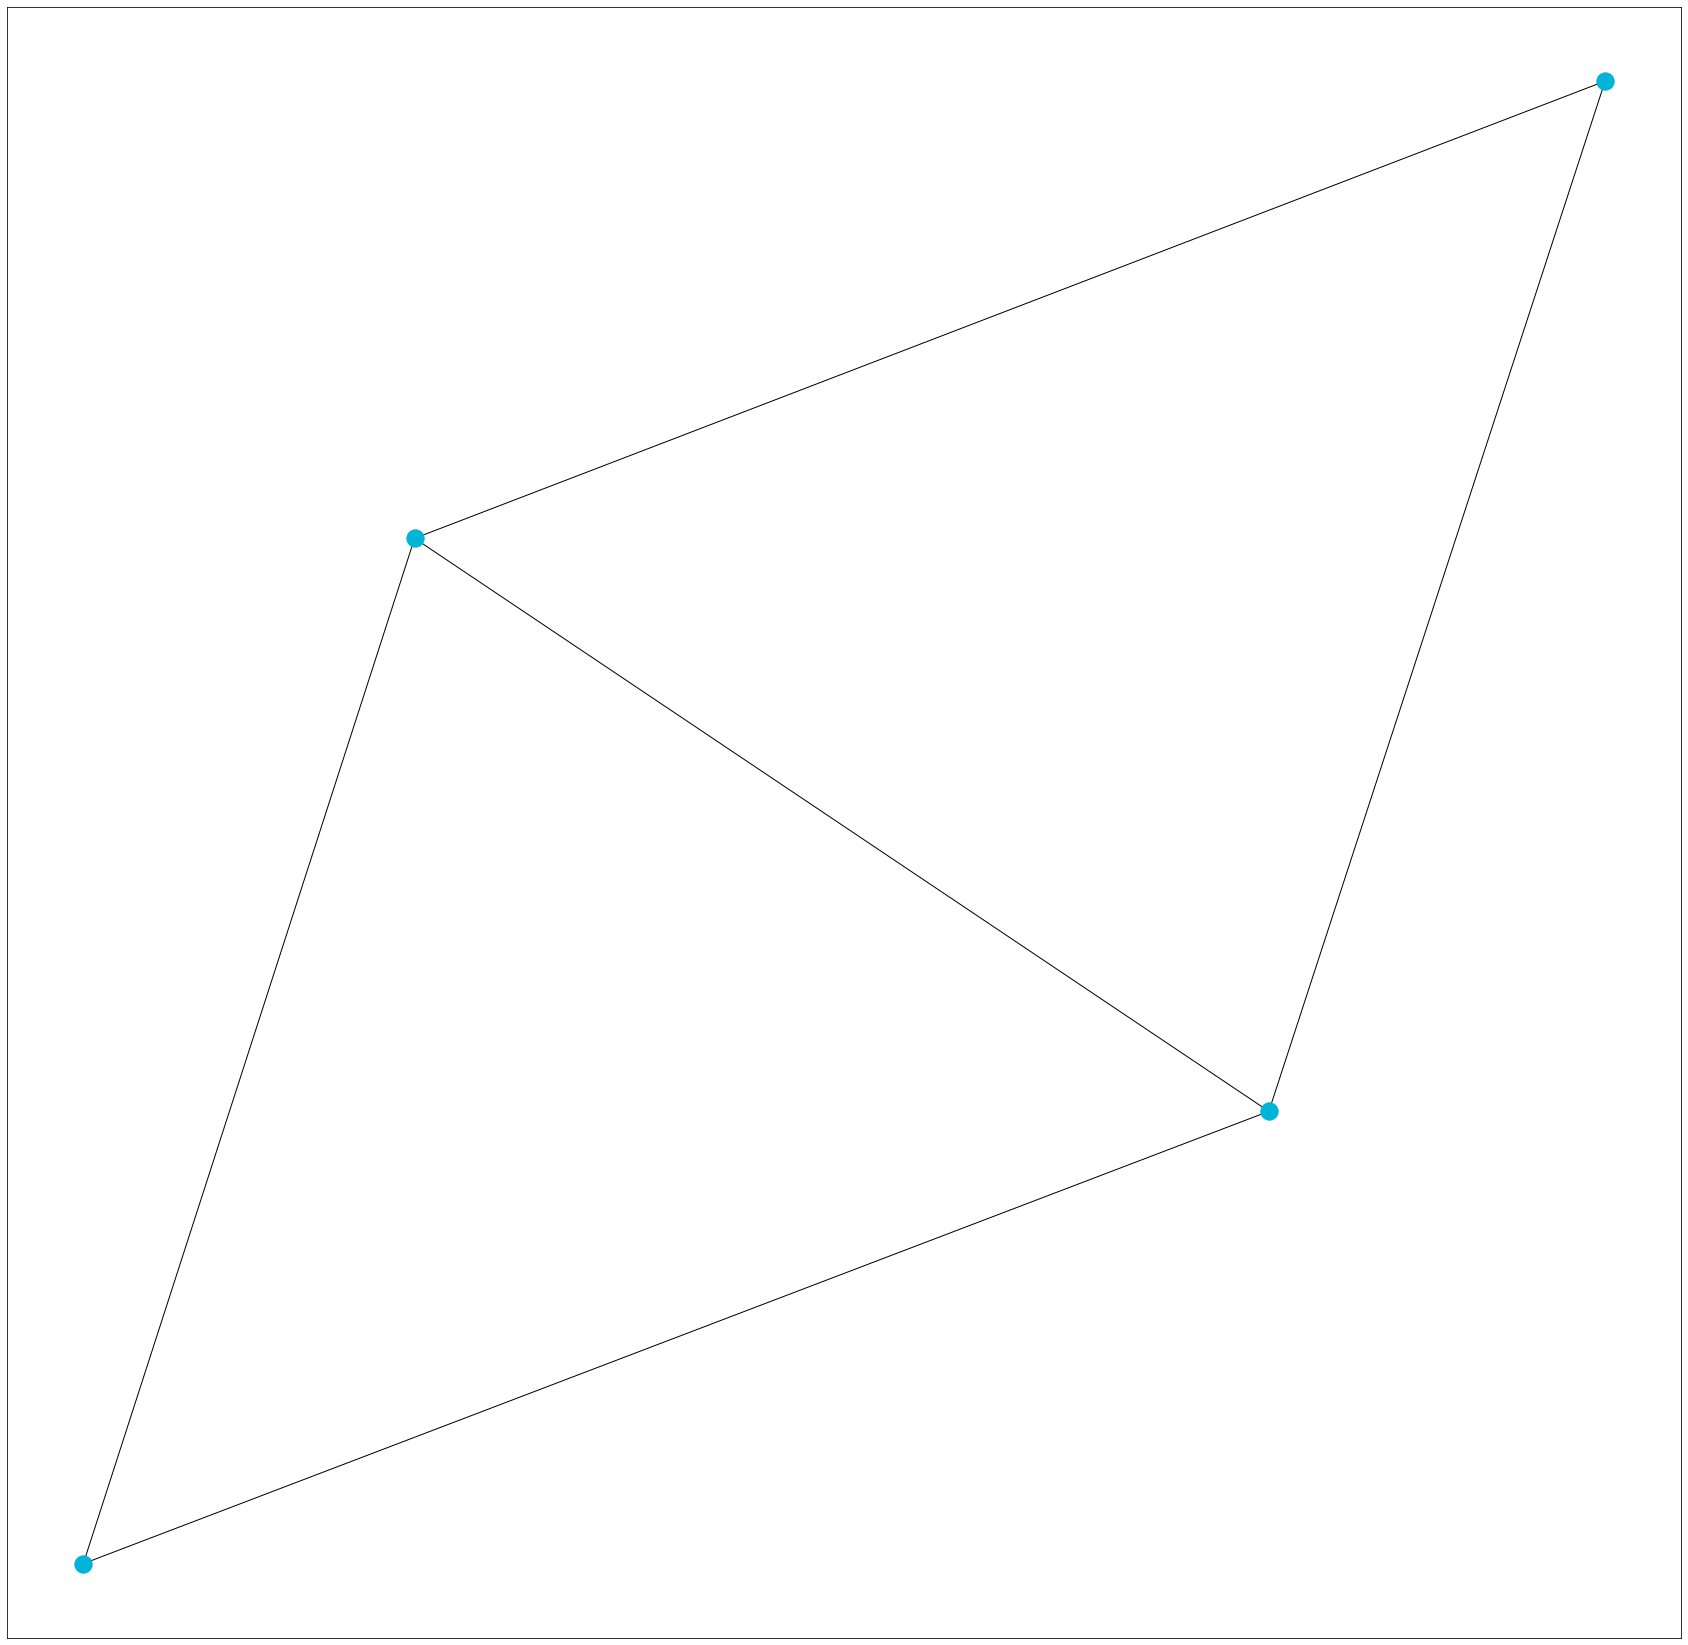

In [22]:
G = H[1]
plt.figure(1, figsize=(30, 30)) 
pos = graphviz_layout(G, prog='dot')
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, labels=node_labels, node_color='#00b4d9')
# plt.text(-2, -0.5, str(query), ha='center', va='baseline', size=20, wrap=True)
plt.savefig('sent_g.png')
plt.show()

In [15]:
len(['In aspect present invention composition have improve soil removal capability provide', 'Non limit example glycerine derivative solvent include material have follow structure Non limit example suitable glycerine derivative solvent use method include glyercine derivative have follow structure R select H', 'detersive surfactant contain numerous large lipophilic moiety', 'detersive surfactant exhibit high solubility profile solvent high molecular weight lead ineffective clean', 'R alkoxylated say alkoxy select ethoxy', 'In embodiment cap nonionic surfactant have general formula linear', 't', 'R hydrogen q r s t independently integer', 'In aspect present invention R hydrocarbon radical formula R select group consist linear saturate provide R branch', 'R methyl', 'In embodiment aspect invention hetero atom select group comprise oxygen', 'In embodiment aspect present invention R select group consist z integer', 'In present invention siloxane base surfactant suitable', 'non immersive clean method disclose U S patent application Nos', 'method present invention service clean service laundromat dry cleaner linen service hotel convention center', 'method present invention add apparatus dry clean solvent process', 'method present invention perform apparatus capable dual mode function', 'apparatus suitable use present invention contain type control system include electrical system smart control system', 'In case electrical control system option control device call smart device provide smart function self diagnostics Internet link allow user start apparatus inform user', 'allow supplier diagnose problem', 'apparatus malfunction', 'call smart communicate clean device complete remainder clean wash machine', 'apparent skilled art change depart spirit invention', 'In embodiment present invention functionalized alkanolamine moiety average T moiety surfactant molecule', 'method present invention perform apparatus capable perform bi modal clean function', 'present invention clean', 'radical have carbon atom carbon atom prefer', 'present invention relate composition treat fabric article', 'In embodiment fabric care composition comprise wt amide surfactant wt water wt detergent adjunct'])

29